In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Import the NumPy and Pandas packages
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
custom_data = pd.DataFrame(pd.read_csv("advertising.csv"))
custom_data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
custom_data_shape = custom_data.shape
print(custom_data_shape)


(200, 4)


In [4]:
custom_data_info = custom_data.info()
print(custom_data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [5]:
custom_data_description = custom_data.describe()
print(custom_data_description)


               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [6]:
# Checking Null values
custom_data_null_percentage = custom_data.isnull().sum() * 100 / custom_data.shape[0]
print(custom_data_null_percentage)
# There are no NULL values in the dataset, hence it is clean.


TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64


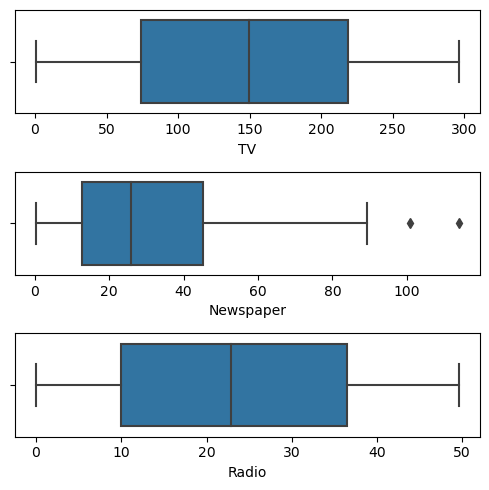

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize=(5, 5))
plt1 = sns.boxplot(custom_data['TV'], ax=axs[0])
plt2 = sns.boxplot(custom_data['Newspaper'], ax=axs[1])
plt3 = sns.boxplot(custom_data['Radio'], ax=axs[2])
plt.tight_layout()


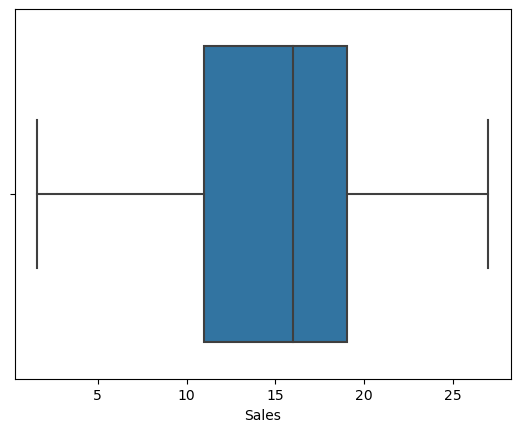

In [8]:
sns.boxplot(custom_data['Sales'])
plt.show()


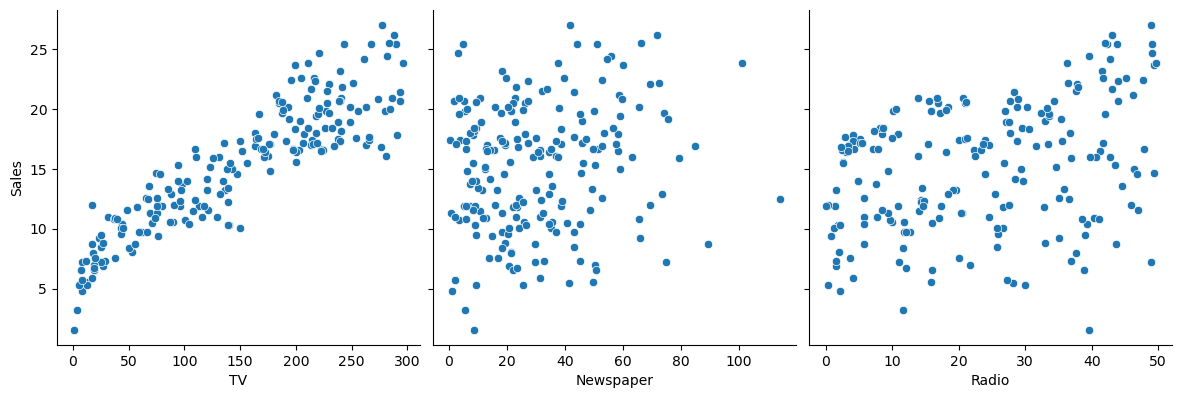

In [9]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(custom_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


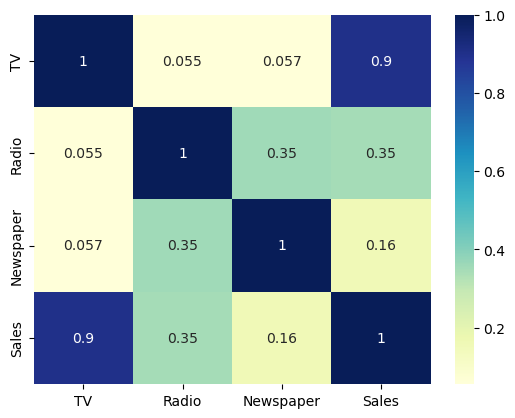

In [10]:
# Let's see the correlation between different variables.
sns.heatmap(custom_data.corr(), cmap="YlGnBu", annot=True)
plt.show()


In [11]:
X_custom = custom_data['TV']
y_custom = custom_data['Sales']


In [12]:
from sklearn.model_selection import train_test_split
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_custom, y_custom, train_size=0.8, test_size=0.2, random_state=100)


In [13]:
# Let's now take a look at the train dataset
X_train_custom.head()


168    215.4
112    175.7
171    164.5
181    218.5
7      120.2
Name: TV, dtype: float64

In [14]:
y_train_custom.head()


168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
Name: Sales, dtype: float64

In [15]:
import statsmodels.api as sm


In [16]:
# Add a constant to get an intercept
X_train_sm_custom = sm.add_constant(X_train_custom)

# Fit the regression line using 'OLS'
lr_custom = sm.OLS(y_train_custom, X_train_sm_custom).fit()


In [17]:
# Print the parameters, i.e., the intercept and the slope of the regression line fitted
lr_custom.params


const    6.995533
TV       0.054105
dtype: float64

In [18]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr_custom.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     727.7
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           5.03e-61
Time:                        10:24:25   Log-Likelihood:                -359.57
No. Observations:                 160   AIC:                             723.1
Df Residuals:                     158   BIC:                             729.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9955      0.343     20.386      0.0

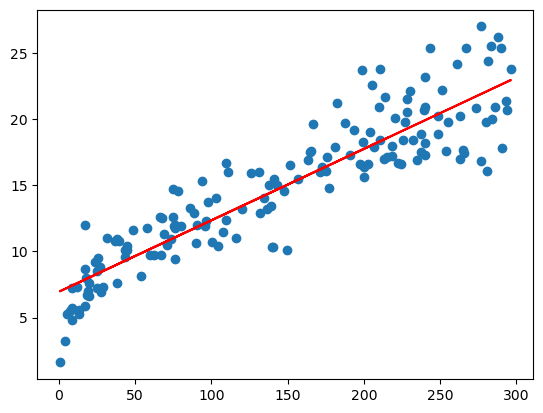

In [19]:
plt.scatter(X_train_custom, y_train_custom)
plt.plot(X_train_custom, 6.948 + 0.054 * X_train_custom, 'r')
plt.show()


In [20]:
y_train_pred_custom = lr_custom.predict(X_train_sm_custom)
res_custom = (y_train_custom - y_train_pred_custom)


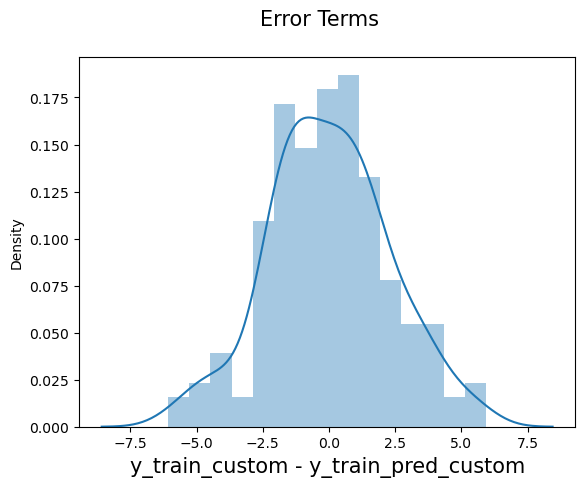

In [21]:
fig_custom = plt.figure()
sns.distplot(res_custom, bins=15)
fig_custom.suptitle('Error Terms', fontsize=15)                  # Plot heading 
plt.xlabel('y_train_custom - y_train_pred_custom', fontsize=15)  # X-label
plt.show()


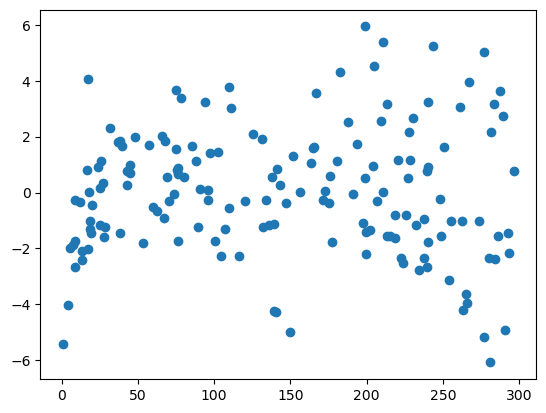

In [22]:
plt.scatter(X_train_custom, res_custom)
plt.show()


In [23]:
# Add a constant to X_test_custom
X_test_sm_custom = sm.add_constant(X_test_custom)

# Predict the y values corresponding to X_test_sm_custom
y_pred_custom = lr_custom.predict(X_test_sm_custom)


In [24]:
y_pred_custom.head()


126     7.417556
104    19.883459
99     14.310594
92     18.774296
111    20.072828
dtype: float64

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [26]:
# Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test_custom, y_pred_custom))


2.3126831803046124

In [27]:
r_squared_custom = r2_score(y_test_custom, y_pred_custom)
r_squared_custom


0.728135274407888

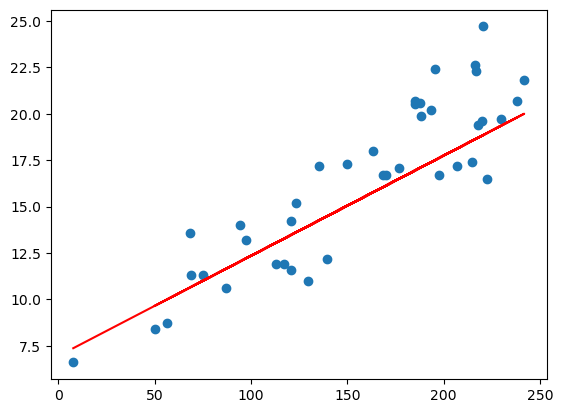

In [28]:
plt.scatter(X_test_custom, y_test_custom)
plt.plot(X_test_custom, 6.948 + 0.054 * X_test_custom, 'r')
plt.show()
